# ASSIGNMENT 1: Iris Data Classification (Using TensorFlow)
## Prepared by [Mustafa Youldash, Ph.D.](https://github.com/youldash)

## This work done by : Abdulaziz Saud Alsubaie - 2180001424

### The Iris Data Set (i.e., Problem Set)

The [Iris data set](https://archive.ics.uci.edu/ml/datasets/Iris/) is a popular data set for classification tasks in machine learning. It consists of 150 samples of iris plants, with each sample consisting of four features (sepal length, sepal width, petal length, and petal width) and a target label indicating the species of the iris plant (setosa, versicolor, or virginica).

To solve the assignment using the Iris data set, students would need to preprocess the data, develop and train a Deep Learning model, and evaluate the performance of the model. Preprocessing the data might involve scaling the features and splitting the data into training and validation sets. Developing and training the model could involve selecting an appropriate architecture and optimization algorithm, setting the learning rate, and choosing the number of epochs. Evaluating the performance of the model could involve using metrics such as accuracy, precision, and recall to assess the model's ability to classify the iris plants correctly.

In [1]:
# What version of Python do you currently have?
import sys


print(sys.version)

3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]


In [2]:
# Do you have TensorFlow installed on your system?
import tensorflow as tf


print(tf.__version__)

2.11.0


## Helpful Functions for Keras and TensorFlow

In [3]:
from util import helper

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a process of analyzing and summarizing a data set in order to understand the underlying structure and relationships within the data. EDA is an important step in the data science process, as it allows you to identify patterns, trends, and anomalies in the data that may not be immediately apparent.

There are several benefits of performing EDA for Deep Learning:

- EDA helps you understand the data: By performing EDA, you can get a better understanding of the data you are working with, including the distribution of the data, the relationships between different features, and any missing or corrupted values.
- EDA can identify potential problems: EDA can help you identify potential problems with the data, such as missing values or outliers, which could impact the performance of your Deep Learning model.
- EDA can inform model selection: EDA can help you understand the characteristics of the data, which can inform your choice of Deep Learning model. For example, if the data is highly non-linear, you may want to consider using a model that is capable of capturing complex relationships, such as a neural network.
- EDA can improve model performance: By understanding the underlying structure of the data, you can better tune the hyperparameters of your Deep Learning model, which can lead to improved performance.

Overall, EDA is an important step in the Deep Learning process, as it helps you understand the data and identify potential issues that could impact the performance of your model. EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data.

In [4]:
import pandas as pd
import os


path = "./data/"
    
filename = os.path.join(path, "iris.csv")    
df = pd.read_csv(filename, na_values=['NA','?'])

In [5]:
# Hint: use a DataFrame for both EDA and model development.

In [6]:
# Your code goes here...

In [7]:
df = pd.read_csv("data/iris.csv")

In [8]:
df.head()

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sepal_l  150 non-null    float64
 1   sepal_w  150 non-null    float64
 2   petal_l  150 non-null    float64
 3   petal_w  150 non-null    float64
 4   species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.describe()

,sepal_l,sepal_w,petal_l,petal_w
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.isnull().sum() # missing values

sepal_l    0
sepal_w    0
petal_l    0
petal_w    0
species    0
dtype: int64

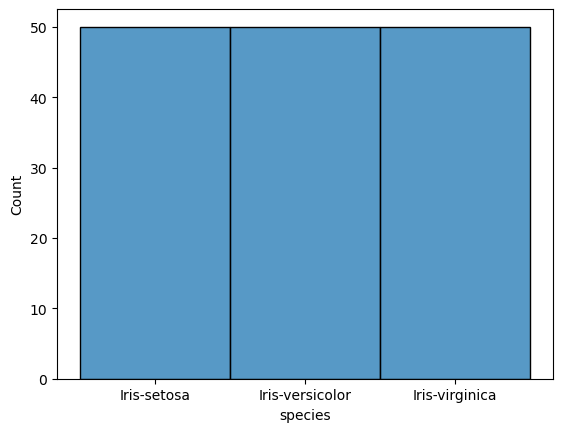

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
  
sns.histplot(x='species', data=df, )
plt.show()  
#balanced data 50 flower for each type

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

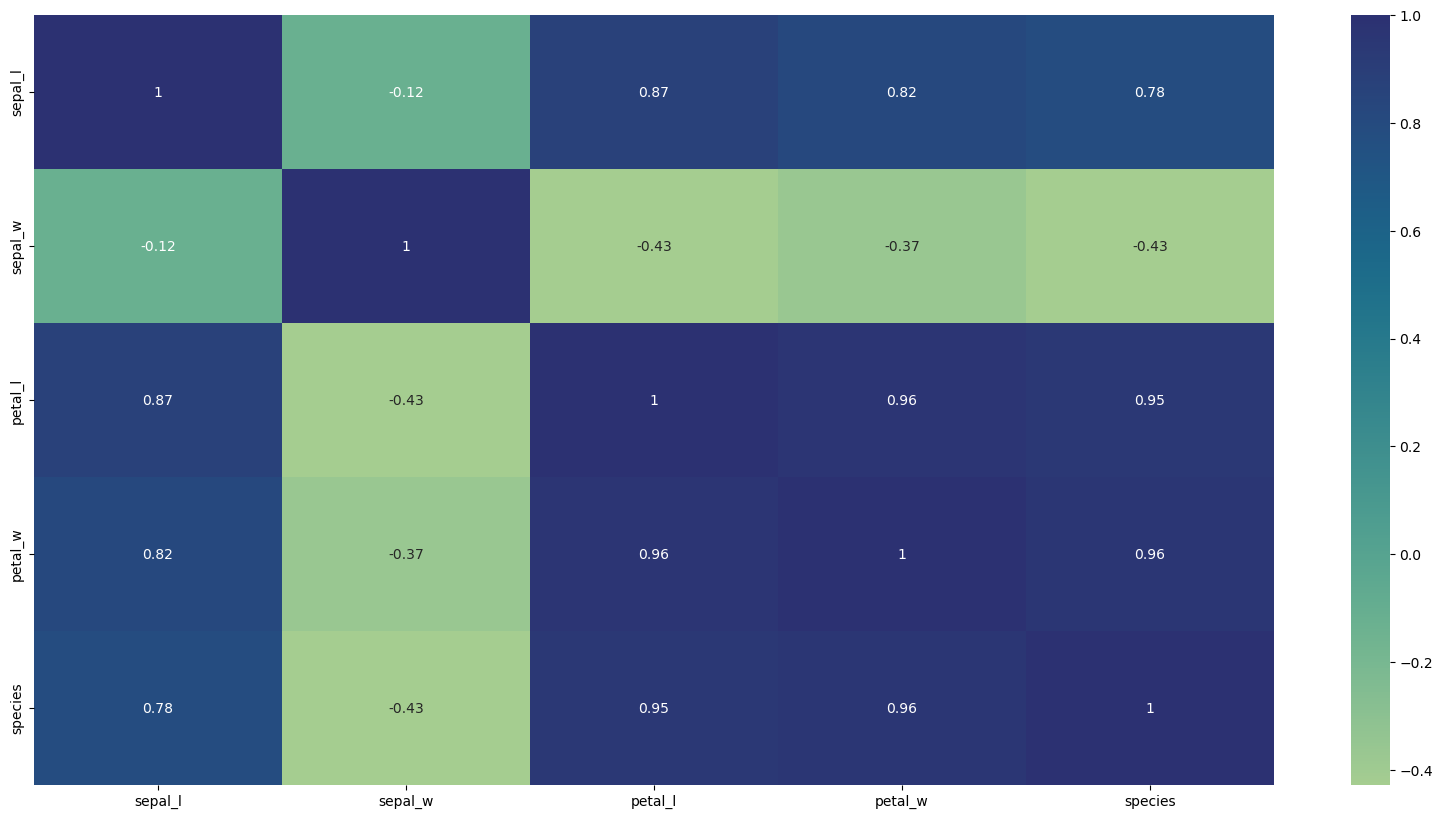

In [129]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="crest")

In [89]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 10)                50        
                                                                 
 dense_36 (Dense)            (None, 8)                 88        
                                                                 
 dense_37 (Dense)            (None, 3)                 27        
                                                                 
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________


# Iris Flower Classification

In [138]:
# Imports.
import pandas as pd
import io
import requests
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [148]:
# File path.
path = "./data/"

# Read the data.
filename = os.path.join(path, "iris.csv")    
df = pd.read_csv(filename, na_values=['NA','?'])

# Encode text values to indexes (i.e., [1],[2],[3] for (red,green,blue) values).
species = helper.encode_text_index(df, "species")

# Convert a Pandas DataFrame to the (x,y) inputs that TensorFlow needs.
x = df.drop(['species'], axis=1)
y = df['species']

le = LabelEncoder()
# Encode text values to indexes (i.e., [1],[2],[3] for (red,green,blue) values).
y = le.fit_transform(y)

#Keras requires your output feature to be one-hot encoded values.
y = to_categorical(y)

# Split the data into training and testing sets.
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=30, random_state=42)

In [149]:
from keras.models import Sequential
from keras.layers import Activation, Dense

In [150]:
# Define, and build your model.
model = Sequential()
model.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', # 4 input features 
                activation='sigmoid')) # Hint: try different activation functions and see which one produces better results.
model.add(Dense(8, kernel_initializer='normal'))# 1 hidden with 3 neruns
model.add(Dense(y.shape[1],activation='softmax')) # 3 flower type columns

# Compile the model.
model.compile(
    loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) # Hint: try different optimizers and see which one produces better results.

# Define the training callbacks.
monitor = EarlyStopping(
    monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='min')
##
filepath = "IrisModel.hdf5"

checkpoint = ModelCheckpoint(filepath, save_weights_only=False,
                             monitor='val_loss', mode='min', save_best_only=True, verbose=1)
##
# Train the model.
model.fit(
    x, y, validation_data=(x_test,y_test),
    callbacks=[monitor,checkpoint], verbose=2, epochs=200)


Epoch 1/200

Epoch 1: val_loss improved from inf to 1.09318, saving model to IrisModel.hdf5
5/5 - 1s - loss: 1.0975 - accuracy: 0.3333 - val_loss: 1.0932 - val_accuracy: 0.3667 - 517ms/epoch - 103ms/step
Epoch 2/200

Epoch 2: val_loss improved from 1.09318 to 1.09071, saving model to IrisModel.hdf5
5/5 - 0s - loss: 1.0948 - accuracy: 0.3333 - val_loss: 1.0907 - val_accuracy: 0.3667 - 37ms/epoch - 7ms/step
Epoch 3/200

Epoch 3: val_loss improved from 1.09071 to 1.08902, saving model to IrisModel.hdf5
5/5 - 0s - loss: 1.0923 - accuracy: 0.3333 - val_loss: 1.0890 - val_accuracy: 0.3667 - 35ms/epoch - 7ms/step
Epoch 4/200

Epoch 4: val_loss improved from 1.08902 to 1.08763, saving model to IrisModel.hdf5
5/5 - 0s - loss: 1.0903 - accuracy: 0.3333 - val_loss: 1.0876 - val_accuracy: 0.3667 - 35ms/epoch - 7ms/step
Epoch 5/200

Epoch 5: val_loss improved from 1.08763 to 1.08644, saving model to IrisModel.hdf5
5/5 - 0s - loss: 1.0891 - accuracy: 0.3333 - val_loss: 1.0864 - val_accuracy: 0.3667 

Epoch 41/200

Epoch 41: val_loss improved from 0.74478 to 0.72444, saving model to IrisModel.hdf5
5/5 - 0s - loss: 0.7458 - accuracy: 0.7133 - val_loss: 0.7244 - val_accuracy: 0.7333 - 36ms/epoch - 7ms/step
Epoch 42/200

Epoch 42: val_loss improved from 0.72444 to 0.70465, saving model to IrisModel.hdf5
5/5 - 0s - loss: 0.7261 - accuracy: 0.7067 - val_loss: 0.7046 - val_accuracy: 0.7333 - 36ms/epoch - 7ms/step
Epoch 43/200

Epoch 43: val_loss improved from 0.70465 to 0.68561, saving model to IrisModel.hdf5
5/5 - 0s - loss: 0.7065 - accuracy: 0.7000 - val_loss: 0.6856 - val_accuracy: 0.7333 - 36ms/epoch - 7ms/step
Epoch 44/200

Epoch 44: val_loss improved from 0.68561 to 0.66695, saving model to IrisModel.hdf5
5/5 - 0s - loss: 0.6879 - accuracy: 0.7000 - val_loss: 0.6669 - val_accuracy: 0.7333 - 36ms/epoch - 7ms/step
Epoch 45/200

Epoch 45: val_loss improved from 0.66695 to 0.64928, saving model to IrisModel.hdf5
5/5 - 0s - loss: 0.6699 - accuracy: 0.7067 - val_loss: 0.6493 - val_accura

Epoch 81/200

Epoch 81: val_loss improved from 0.35742 to 0.35223, saving model to IrisModel.hdf5
5/5 - 0s - loss: 0.3626 - accuracy: 0.9667 - val_loss: 0.3522 - val_accuracy: 0.9667 - 39ms/epoch - 8ms/step
Epoch 82/200

Epoch 82: val_loss improved from 0.35223 to 0.34715, saving model to IrisModel.hdf5
5/5 - 0s - loss: 0.3569 - accuracy: 0.9667 - val_loss: 0.3471 - val_accuracy: 0.9667 - 38ms/epoch - 8ms/step
Epoch 83/200

Epoch 83: val_loss improved from 0.34715 to 0.34255, saving model to IrisModel.hdf5
5/5 - 0s - loss: 0.3519 - accuracy: 0.9667 - val_loss: 0.3426 - val_accuracy: 0.9667 - 36ms/epoch - 7ms/step
Epoch 84/200

Epoch 84: val_loss improved from 0.34255 to 0.33727, saving model to IrisModel.hdf5
5/5 - 0s - loss: 0.3464 - accuracy: 0.9667 - val_loss: 0.3373 - val_accuracy: 0.9667 - 39ms/epoch - 8ms/step
Epoch 85/200

Epoch 85: val_loss improved from 0.33727 to 0.33246, saving model to IrisModel.hdf5
5/5 - 0s - loss: 0.3418 - accuracy: 0.9667 - val_loss: 0.3325 - val_accura

5/5 - 0s - loss: 0.1905 - accuracy: 0.9800 - val_loss: 0.1881 - val_accuracy: 0.9667 - 36ms/epoch - 7ms/step
Epoch 121/200

Epoch 121: val_loss improved from 0.18810 to 0.18537, saving model to IrisModel.hdf5
5/5 - 0s - loss: 0.1877 - accuracy: 0.9800 - val_loss: 0.1854 - val_accuracy: 0.9667 - 37ms/epoch - 7ms/step
Epoch 122/200

Epoch 122: val_loss improved from 0.18537 to 0.18249, saving model to IrisModel.hdf5
5/5 - 0s - loss: 0.1849 - accuracy: 0.9800 - val_loss: 0.1825 - val_accuracy: 0.9667 - 37ms/epoch - 7ms/step
Epoch 123/200

Epoch 123: val_loss improved from 0.18249 to 0.17972, saving model to IrisModel.hdf5
5/5 - 0s - loss: 0.1818 - accuracy: 0.9800 - val_loss: 0.1797 - val_accuracy: 0.9667 - 36ms/epoch - 7ms/step
Epoch 124/200

Epoch 124: val_loss improved from 0.17972 to 0.17717, saving model to IrisModel.hdf5
5/5 - 0s - loss: 0.1785 - accuracy: 0.9800 - val_loss: 0.1772 - val_accuracy: 0.9667 - 37ms/epoch - 7ms/step
Epoch 125/200

Epoch 125: val_loss improved from 0.1771

Epoch 160/200

Epoch 160: val_loss improved from 0.11719 to 0.11618, saving model to IrisModel.hdf5
5/5 - 0s - loss: 0.1163 - accuracy: 0.9667 - val_loss: 0.1162 - val_accuracy: 0.9667 - 36ms/epoch - 7ms/step
Epoch 161/200

Epoch 161: val_loss improved from 0.11618 to 0.11404, saving model to IrisModel.hdf5
5/5 - 0s - loss: 0.1145 - accuracy: 0.9800 - val_loss: 0.1140 - val_accuracy: 0.9667 - 38ms/epoch - 8ms/step
Epoch 162/200

Epoch 162: val_loss improved from 0.11404 to 0.11294, saving model to IrisModel.hdf5
5/5 - 0s - loss: 0.1124 - accuracy: 0.9800 - val_loss: 0.1129 - val_accuracy: 0.9667 - 36ms/epoch - 7ms/step
Epoch 163/200

Epoch 163: val_loss did not improve from 0.11294
5/5 - 0s - loss: 0.1137 - accuracy: 0.9733 - val_loss: 0.1131 - val_accuracy: 1.0000 - 22ms/epoch - 4ms/step
Epoch 164/200

Epoch 164: val_loss improved from 0.11294 to 0.11072, saving model to IrisModel.hdf5
5/5 - 0s - loss: 0.1126 - accuracy: 0.9733 - val_loss: 0.1107 - val_accuracy: 0.9667 - 37ms/epoch - 

5/5 - 0s - loss: 0.0882 - accuracy: 0.9800 - val_loss: 0.0855 - val_accuracy: 0.9667 - 37ms/epoch - 7ms/step
Epoch 200/200

Epoch 200: val_loss improved from 0.08548 to 0.08474, saving model to IrisModel.hdf5
5/5 - 0s - loss: 0.0865 - accuracy: 0.9800 - val_loss: 0.0847 - val_accuracy: 0.9667 - 38ms/epoch - 8ms/step


In [151]:
model.load_weights("IrisModel.hdf5")

In [152]:
model.evaluate(x_train,y_train)

4/4 [==============================] - 0s 997us/step - loss: 0.0862 - accuracy: 0.9833


[0.08618278801441193, 0.9833333492279053]

In [153]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 15ms/step - loss: 0.0847 - accuracy: 0.9667


[0.08474169671535492, 0.9666666388511658]

In [154]:
from sklearn import metrics


# Evaluate the success rate using accuracy.
pred = [0,2,1]

y_compare = [0,2,1]

## Log the accuracy score.
score = metrics.accuracy_score(y_compare, pred)
print("Accuracy score: {}".format(score))

Accuracy score: 1.0


In [155]:
y_pred = model.predict(x_test)
y_pred

1/1 [==============================] - 0s 36ms/step


array([[4.12787823e-03, 9.26281810e-01, 6.95903450e-02],
       [9.94250655e-01, 5.74938813e-03, 4.36821239e-11],
       [1.58333506e-08, 9.87478066e-04, 9.99012470e-01],
       [2.79156747e-03, 8.75544608e-01, 1.21663794e-01],
       [2.85447924e-03, 8.87731969e-01, 1.09413564e-01],
       [9.90958095e-01, 9.04183835e-03, 1.40164283e-10],
       [4.22676019e-02, 9.55578387e-01, 2.15397635e-03],
       [2.39772526e-05, 9.58120227e-02, 9.04164076e-01],
       [4.46242600e-04, 4.83175635e-01, 5.16378164e-01],
       [2.07341127e-02, 9.72694635e-01, 6.57118857e-03],
       [1.26031257e-04, 2.54236519e-01, 7.45637476e-01],
       [9.90453601e-01, 9.54636931e-03, 1.63547981e-10],
       [9.95446265e-01, 4.55367472e-03, 2.48637066e-11],
       [9.90664840e-01, 9.33513697e-03, 1.52971191e-10],
       [9.94376540e-01, 5.62349660e-03, 4.28868122e-11],
       [3.82931740e-03, 9.17164266e-01, 7.90063664e-02],
       [7.53764823e-07, 1.12761194e-02, 9.88723159e-01],
       [1.57656018e-02, 9.73955

In [156]:
actual = np.argmax(y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)
print(f"Actual:    {actual}")
print(f"Predicted: {predicted}")
# I applied this code based on an image processing project.

Actual:    [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Predicted: [1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [157]:
score = metrics.accuracy_score(y_compare, pred)
print("Accuracy score: {}".format(score))

Accuracy score: 1.0


# Reflection 

As instructed, I began the process of developing a deep learning model by utilizing the "Iris" dataset. This dataset is a categorical classification, which means that in the model target, we have three different types of iris flowers: "Iris-setosa, Iris-versicolor, and Iris-virginica." To train the model, we will use 80% of the data, and the remaining 20% will be used for testing. The primary objective of my work is to categorize the types of flowers using the properties of the flowers themselves, with the aim of achieving high training accuracy and high testing accuracy while avoiding either overfitting or underfitting. An input layer, a hidden layer, and an output layer are all included in my model. There is one layer that makes up the input layer, and it is comprised of four neurons that each have an "x.shape[1]." This notation refers to the total number of features where are 4. We have two hidden levels: the first one has 10 neurons, and the other one only has three neurons. In the code for the output layers, we have one layer with three neurons as written in the code "y.shape[1]".

For the trained model, use the model. fit() function. I applied the Keras function Callbacks API [1], which will determine the number of epochs that helps to train the model for a specific amount. For my model, I applied 200 epochs, which will train the model 200 times; however, in order to stop on the high accuracy, I applied the EarlyStopping function [2].One of the important Keras models is ModelCheckpoint which helps with training by determining the minimum loss value and storing it using monitor='val_loss'[3].

The optimal result I got was 98.3% for the training with a loss of 0.0780 and 96.6% for the testing with a loss: of 0.0835. I tried many activation functions, so the best activation function I used was {Sigmoid, softmax}, and for the optimizer, I used {adam}.One of the important Keras models is ModelCheckpoint which helps with training by determining the minimum loss value and storing it using monitor='val_loss'[3].

In conclusion, I was able to train a deep-learning model for the very first time while simultaneously achieving a high level of accuracy. In addition to that, I became familiar with the use of the activation function and optimizers such as Adam. I had to deal with certain difficulties because of the low accuracy, but I was able to overcome them and improve the accuracy by adding hidden layers, experimenting with optimizers, and using activation functions. This task provided a wonderful chance to expand our deep-learning theoretical experience by implementing deep-learning models, and the process of completing this assignment raised my interest in deep-learning strategies even further.
